In [34]:
#Multi class classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [35]:
#Accessing the dataset
from tensorflow.keras.datasets import fashion_mnist

In [36]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [37]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

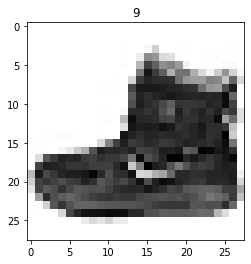

In [38]:
#Visualisation of the data
plt.imshow(X_train[0],'Greys')
plt.title(y_train[0]);

In [39]:
#Creating a dictionary of nos and respective fashion items
fashion_dict={0:'T-shirt/top',
1:'Trouser',
2:'Pullover',
3:'Dress',
4:'Coat',
5:'Sandal',
6:'Shirt',
7:'Sneaker',
8:'Bag',
9:'Ankle boot'}

In [40]:
fashion_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

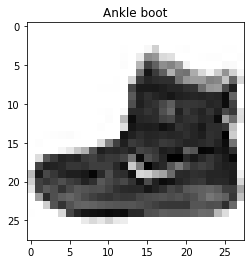

In [41]:
plt.imshow(X_train[0],'Greys')
plt.title(fashion_dict[y_train[0]]);

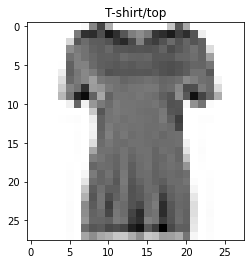

In [42]:
plt.imshow(X_train[10],'Greys')
plt.title(fashion_dict[y_train[10]]);

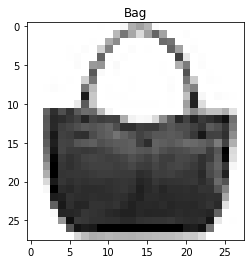

In [43]:
plt.imshow(X_train[100],'Greys')
plt.title(fashion_dict[y_train[100]]);

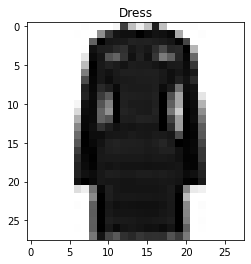

In [44]:
plt.imshow(X_train[500],'Greys')
plt.title(fashion_dict[y_train[500]]);

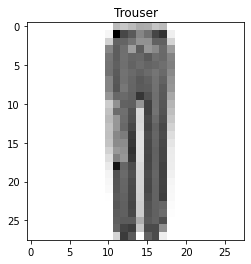

In [45]:
plt.imshow(X_train[1000],'Greys')
plt.title(fashion_dict[y_train[1000]]);

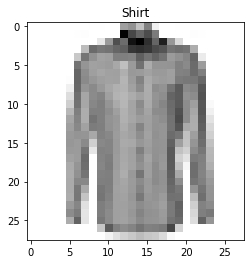

In [46]:
plt.imshow(X_train[3000],'Greys')
plt.title(fashion_dict[y_train[3000]]);

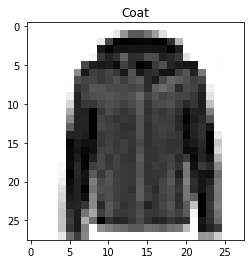

In [47]:
plt.imshow(X_train[5000],'Greys')
plt.title(fashion_dict[y_train[5000]]);

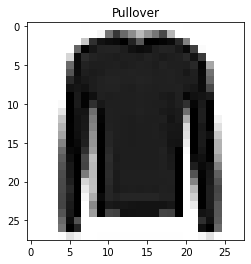

In [48]:
plt.imshow(X_train[15000],'Greys')
plt.title(fashion_dict[y_train[15000]]);

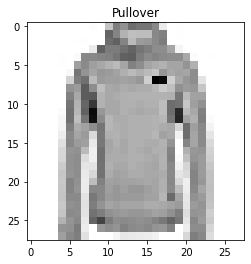

In [49]:
plt.imshow(X_train[45000],'Greys')
plt.title(fashion_dict[y_train[45000]]);

In [50]:
#Building the model
fashion_1=tf.keras.Sequential()#28*28=784 units in a input layer converted into a 784*1 vector->flattening, as there are 10 distinct fashion items, so the output layer has 10 units
fashion_1.add(tf.keras.layers.Flatten()) #the hidden layer should have between 10 and 784 units
fashion_1.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_1.add(tf.keras.layers.Dense(10,activation='softmax'))#soft max will calculate the (exponential of weights*x)/sum(exponential of weights*x), greater than 0 less than 1, sum will be 1-> probability

In [53]:
#Compiling the model
fashion_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 3.3806 - accuracy: 0.7374
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8053
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5163 - accuracy: 0.8201
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4908 - accuracy: 0.8261
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4946 - accuracy: 0.8292
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4694 - accuracy: 0.8349
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4609 - accuracy: 0.8392
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4647 - accuracy: 0.8369
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4507 - accuracy: 0.8417
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.441

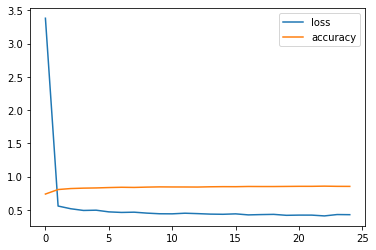

In [54]:
#Training the model
tf.random.set_seed(100)
history_1=fashion_1.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_1.history).plot();

In [55]:
#Evaluation of the model
test_loss,test_accuracy=fashion_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.8229


In [56]:
print('The test Loss:',test_loss)
print('The Test Accuracy',test_accuracy)

The test Loss: 0.5468084216117859
The Test Accuracy 0.8228999972343445


In [57]:
#Improving the model by adding 1 more hidden layer
fashion_2=tf.keras.Sequential()
fashion_2.add(tf.keras.layers.Flatten()) 
fashion_2.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_2.add(tf.keras.layers.Dense(100,activation='relu'))#Adding a layer of 100 units
fashion_2.add(tf.keras.layers.Dense(10,activation='softmax'))

In [58]:
fashion_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2530 - accuracy: 0.7698
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4925 - accuracy: 0.8300
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4449 - accuracy: 0.8418
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4187 - accuracy: 0.8517
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3995 - accuracy: 0.8584
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3867 - accuracy: 0.8638
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3741 - accuracy: 0.8682
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3659 - accuracy: 0.8710
Epoch 9/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3561 - accuracy: 0.8743
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0

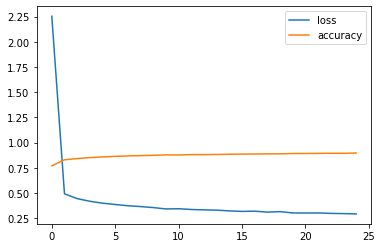

In [60]:
tf.random.set_seed(100)
history_2=fashion_2.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_2.history).plot();

In [61]:
test_loss,test_accuracy=fashion_2.evaluate(X_test,y_test)
print('Test loss',test_loss)
print('Test accuracy',test_accuracy)#this model is better, if the difference between prev and new would have been more then overfitting

313/313 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.8618
Test loss 0.4505595266819
Test accuracy 0.8618000149726868


In [62]:
#Improving the model by adding 1 more hidden layer
fashion_3=tf.keras.Sequential()
fashion_3.add(tf.keras.layers.Flatten()) 
fashion_3.add(tf.keras.layers.Dense(300,activation='relu'))
fashion_3.add(tf.keras.layers.Dense(100,activation='relu'))
fashion_3.add(tf.keras.layers.Dense(25,activation='relu'))#Adding a layer of 25 units
fashion_3.add(tf.keras.layers.Dense(10,activation='softmax'))

In [63]:
fashion_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4589 - accuracy: 0.1195
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3029 - accuracy: 0.0992
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.1007
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0990
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.0996
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0964
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 2.302

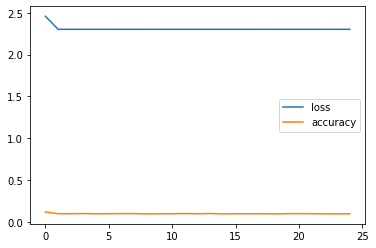

In [64]:
tf.random.set_seed(100)
history_3=fashion_3.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_3.history).plot();

In [65]:
#fashion_3 is not good, go ahead with fashion_2 as accuracy is less

In [66]:
#Changing the no. of units to improve the model
fashion_4=tf.keras.Sequential()
fashion_4.add(tf.keras.layers.Flatten()) 
fashion_4.add(tf.keras.layers.Dense(200,activation='relu'))#Changing the no. of units
fashion_4.add(tf.keras.layers.Dense(100,activation='relu'))#Adding a layer of 100 units
fashion_4.add(tf.keras.layers.Dense(10,activation='softmax'))


In [68]:
fashion_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2224 - accuracy: 0.7443
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6171 - accuracy: 0.7987
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5472 - accuracy: 0.8134
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4973 - accuracy: 0.8286
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4562 - accuracy: 0.8406
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4293 - accuracy: 0.8474
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4119 - accuracy: 0.8539
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4019 - accuracy: 0.8556
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3856 - accuracy: 0.8611
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.385

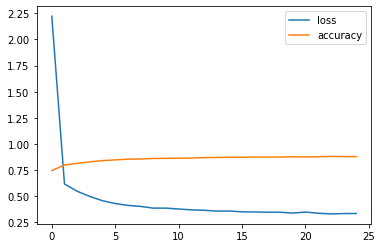

In [69]:
tf.random.set_seed(100)
history_4=fashion_4.fit(X_train,y_train,epochs=25)
pd.DataFrame(history_4.history).plot();

In [70]:
test_loss,test_accuracy=fashion_4.evaluate(X_test,y_test)
print('Test loss',test_loss)
print('Test accuracy',test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.4424 - accuracy: 0.8579
Test loss 0.4424266219139099
Test accuracy 0.8579000234603882


In [71]:
#Note: fashion_2 is the best model
#model summary
fashion_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               235500    
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


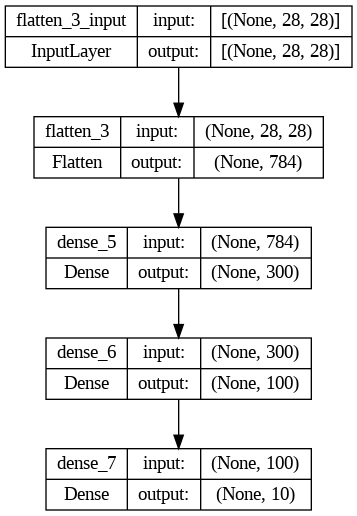

In [72]:
#Plotting the model
from tensorflow.keras.utils import plot_model
plot_model(fashion_2,show_shapes=True)

In [73]:
#Prediction
y_pred=fashion_2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [74]:
y_pred

array([[0.00000000e+00, 0.00000000e+00, 2.64000364e-33, ...,
        2.09863321e-03, 1.60088296e-18, 9.97895181e-01],
       [3.19499293e-07, 5.18997241e-11, 9.99603093e-01, ...,
        0.00000000e+00, 2.53691484e-10, 0.00000000e+00],
       [0.00000000e+00, 9.99999940e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.20104413e-15, 2.08052534e-22, 5.47482948e-22, ...,
        1.20921057e-38, 9.99999940e-01, 0.00000000e+00],
       [0.00000000e+00, 9.99999940e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.30204777e-10, 0.00000000e+00, 3.77439364e-11, ...,
        4.33712360e-03, 1.16801445e-07, 7.47925893e-04]], dtype=float32)

In [75]:
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 2.6400036e-33, 0.0000000e+00,
       0.0000000e+00, 6.2328245e-06, 7.2520545e-28, 2.0986332e-03,
       1.6008830e-18, 9.9789518e-01], dtype=float32)

In [76]:
np.argmax(y_pred[0])

9

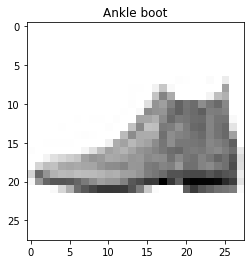

In [77]:
plt.imshow(X_test[0],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[0])]);

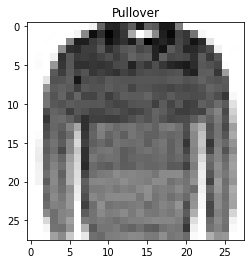

In [78]:
plt.imshow(X_test[20],'Greys')
plt.title(fashion_dict[np.argmax(y_pred[20])]);